<a href="https://colab.research.google.com/github/minego99/HEAJ_GameJam_2022/blob/main/Image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#inspired from
# https://medium.com/data-science/clear-and-visual-explanation-of-the-k-means-algorithm-applied-to-image-compression-b7fdc547e410
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load image using PIL
folder = '/content/'
imagename = 'original picture-2129ko.jpg'
imagename = 'original picture-2129ko.jpg'
image = Image.open(folder+imagename)  # Replace with your image path
img_array = np.array(image)
img_array.shape

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/00_datamining/IMG_4200.jpeg'

In [ ]:
print(type(image), type(img_array))

<class 'PIL.JpegImagePlugin.JpegImageFile'> <class 'numpy.ndarray'>


In [ ]:
# Reshape to 2D array of pixels (rows) with RGB values (columns)
pixels = img_array.reshape((-1, 3))
pixels.shape

(12192768, 3)

In [ ]:
dfpixels = pd.DataFrame(pixels)
dfpixels.head()

,0,1,2
0,47,62,55
1,45,60,53
2,43,58,51
3,43,58,51
4,47,60,53


In [ ]:
dfpixels.drop_duplicates().shape

(367313, 3)

In [ ]:
!pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.17.1
    Uninstalling ipykernel-6.17.1:
      Successfully uninstalled ipykernel-6.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==6.17.1, but you have ipykernel 6.29.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible

In [ ]:
from skimpy import skim
skim(dfpixels)

NameError: name 'dfpixels' is not defined

In [ ]:
img_array.shape

(3024, 4032, 3)

In [ ]:
img_array.shape[0] * img_array.shape[1] == pixels.shape[0]

True

In [ ]:
# Piece of code to check if if is the same pixel at the same place between img_array and pixels
row, col = 0, 0

# Extract pixel from original image array
pixel_img_array = img_array[row, col]

# Calculate corresponding index in the reshaped pixels array
index_pixels = row * img_array.shape[1] + col
print("index_pixels:", index_pixels)
pixel_pixels = pixels[index_pixels]

# Check if they are equal
print("Pixel from img_array:", pixel_img_array)
print("Pixel from pixels:", pixel_pixels)
print("Are they equal?", np.array_equal(pixel_img_array, pixel_pixels))


index_pixels: 0
Pixel from img_array: [47 62 55]
Pixel from pixels: [47 62 55]
Are they equal? True


In [ ]:
nbr_cluster = 32

In [ ]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=nbr_cluster, random_state=42, init='k-means++')
kmeans.fit(pixels)

KMeans(n_clusters=32, random_state=42)

In [ ]:
dir(kmeans)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_algorithm',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params_vs_input',
 '_check_test_data',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_features_out',
 '_n_init',
 '_n_threads',
 '_parameter_constraints',
 '_re

In [ ]:
# check the maximum number of runs possible versus the number of runs done
print("Maximum number of runs: ", kmeans.max_iter)
print("Number of runs: ", kmeans.n_iter_)

Maximum number of runs:  300
Number of runs:  74


In [ ]:
kmeans.cluster_centers_

array([[ 67.67441317, 119.10594815, 129.32960779],
       [190.0973948 , 192.53629668, 160.58763106],
       [ 37.20820905,  43.67294493,  39.7475491 ],
       [147.11390927, 149.55900145, 124.60782689],
       [251.41516689, 253.08089132, 251.83072994],
       [ 70.08204088,  86.22624527,  83.7235511 ],
       [189.91310004, 189.86201007, 187.26099503],
       [107.74173901, 108.20229529,  97.1188226 ],
       [  6.27876024,  10.1758023 ,   8.37645704],
       [115.69595176, 155.49381615, 178.40234917],
       [173.79763402, 205.23037823, 236.27324378],
       [ 90.91213632, 135.62216788, 152.18206045],
       [ 53.9714146 , 100.5259364 , 106.89763738],
       [ 39.96847772,  83.71149564,  88.78527095],
       [169.97499823, 171.18889831, 167.71545709],
       [126.14486721, 126.82348202, 111.3920842 ],
       [130.13183643, 136.64705131, 134.01833994],
       [ 86.40060087, 102.20975601, 100.62189328],
       [210.70681938, 210.30410296, 197.84708394],
       [ 73.72784826,  75.92785

In [ ]:
# check number of unique value of labels for each pixel. Label = cluster number provided by kmeans
len(set(kmeans.labels_))

32

In [ ]:
print(kmeans.labels_.shape, kmeans.labels_[0])

(12192768,) 24


In [ ]:
print(kmeans.cluster_centers_.shape, kmeans.cluster_centers_[24])

(32, 3) [46.81307519 54.5571798  49.89704232]


In [ ]:
kmeans.cluster_centers_[np.array([0, 2,])]

array([[ 67.67441317, 119.10594815, 129.32960779],
       [ 37.20820905,  43.67294493,  39.7475491 ]])

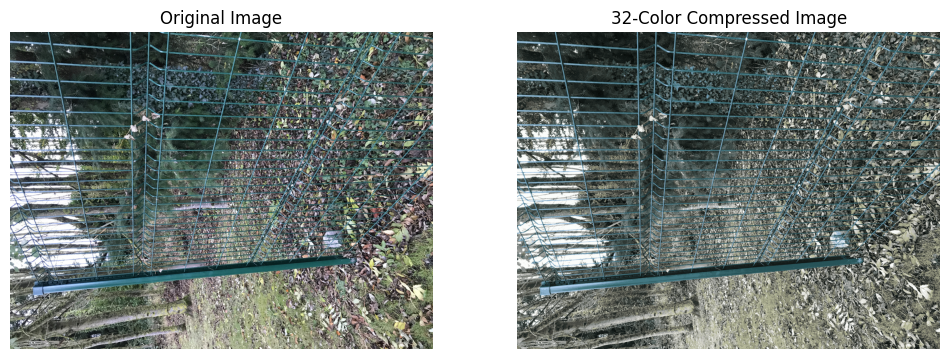

In [ ]:
# Create compressed image array
compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]
compressed_img = compressed_pixels.reshape(img_array.shape).astype(np.uint8)

# Create side-by-side comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(img_array)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(compressed_img)
ax2.set_title(str(nbr_cluster)+'-Color Compressed Image')
ax2.axis('off')

plt.show()


In [ ]:
compressed_img.shape

(3024, 4032, 3)

In [ ]:
# https://www.techsmith.com/blog/jpg-vs-png/
original_image = Image.fromarray(img_array)
original_image.save(folder + 'original-' + imagename.replace('.jpeg', '.png'), format='PNG')

compressed_image = Image.fromarray(compressed_img)
compressed_image.save(folder + 'comp-' + imagename.replace('.jpeg', '.png'), format='PNG')

PIL.Image.Image